# Top 10000 Songs on Spotify 1960-Now

Discover the musical journey through time with the 'Top 10000 Spotify Songs - ARIA and Billboard Charts' dataset, a meticulously curated collection of 10,000 of the most influential and popular songs spanning from 1960 to the present day. This comprehensive dataset draws its rankings from both the esteemed ARIA (Australian Recording Industry Association) and Billboard charts, ensuring a rich representation of songs that have not only achieved commercial success but have also left an indelible mark on the cultural tapestry.

Encompassing a diverse array of music genres, this dataset serves as a musical time capsule, offering insights into the evolution of musical trends over the decades. From timeless classics that have stood the test of time to contemporary hits that shape today's music landscape, the dataset provides a holistic view of the dynamic nature of popular music.

Featuring tracks from iconic artists and bands, the collection is a celebration of musical artistry, showcasing the contributions of legendary musicians alongside those of contemporary chart-toppers. Whether you're a researcher delving into the intricacies of music popularity, a music enthusiast exploring the legacy of specific artists or albums, or a data analyst seeking to understand genre shifts, this dataset offers a wealth of information.

Unlock the potential for a myriad of applications, from analyzing trends in music popularity to studying the lasting influence of specific artists or albums. Delve into the rich history of popular music, explore the ebb and flow of genres, and even build sophisticated recommendation systems based on the historical preferences of music lovers worldwide.

Embark on a journey through the Top 10000 Spotify Songs dataset, where every song tells a story and contributes to the vibrant mosaic of the ever-changing world of popular music.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("top_10000_1960-now.csv") ## Read the csv file

In [3]:
df.head() ## Visualise the 5 data frames

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [4]:
df.shape

(9999, 35)

Indentifying the catergorical and continuous type data

In [5]:
def find_categorical_columns(dataframe):
    # Select columns with data types 'object' or 'category' (assumed to be categorical)
    categorical_cols = dataframe.select_dtypes(include=['object', 'category'])
    
    # Initialize a list to store information about each categorical column
    category_info = []
    
    # Iterate over each categorical column
    for col in categorical_cols.columns:
        # Find unique categories in the column
        unique_categories = categorical_cols[col].unique()
        
        # Get the number of unique categories
        num_categories = len(unique_categories)
        
        # Append information about the column to the list
        category_info.append({
            'Column': col,
            'Number of Categories': num_categories,
            'Categories': unique_categories
        })
    
    # Create a DataFrame from the collected information
    category_info_df = pd.DataFrame(category_info)
    
    # Return the DataFrame containing information about categorical columns
    return category_info_df

In [6]:
# Call the function find_categorical_columns with DataFrame 'df'
categorical_columns_df = find_categorical_columns(df)
# Display the DataFrame containing information about categorical columns
categorical_columns_df

,Column,Number of Categories,Categories
0,Track URI,9951,"[spotify:track:1XAZlnVtthcDZt2NI1Dtxo, spotify..."
1,Track Name,8259,"[Justified & Ancient - Stand by the Jams, I Kn..."
2,Artist URI(s),4135,"[spotify:artist:6dYrdRlNZSKaVxYg5IrvCH, spotif..."
3,Artist Name(s),4130,"[The KLF, Pitbull, Britney Spears, The Kinks, ..."
4,Album URI,7463,"[spotify:album:4MC0ZjNtVP1nDD5lsLxFjc, spotify..."
5,Album Name,6637,"[Songs Collection, Pitbull Starring In Rebelut..."
6,Album Artist URI(s),3299,"[spotify:artist:6dYrdRlNZSKaVxYg5IrvCH, spotif..."
7,Album Artist Name(s),3295,"[The KLF, Pitbull, Britney Spears, The Kinks, ..."
8,Album Release Date,3333,"[1992-08-03, 2009-10-23, 1999-01-12, 2014-10-2..."
9,Album Image URL,7461,[https://i.scdn.co/image/ab67616d0000b27355346...


In [7]:
def find_continuous_types(dataframe):
    # Select columns with numeric data types (assumed to be continuous)
    numeric_cols = dataframe.select_dtypes(include=['number'])

    # Initialize a list to store information about each numeric column
    numeric_info = []

    # Iterate over each numeric column
    for col in numeric_cols.columns:
        # Append information about the column to the list
        numeric_info.append({
            'Column': col,
            'Type': 'Continuous',
            'Min': dataframe[col].min(),
            'Max': dataframe[col].max(),
            'Mean': dataframe[col].mean(),
            'Std': dataframe[col].std()
        })

    # Create a DataFrame from the collected information
    numeric_info_df = pd.DataFrame(numeric_info)

    # Return the DataFrame containing information about numeric columns
    return numeric_info_df


In [8]:
# Call the function find_continuous_types with DataFrame 'df'
continuous_columns_df = find_continuous_types(df)

# Display the DataFrame containing information about continuous columns
continuous_columns_df


,Column,Type,Min,Max,Mean,Std
0,Disc Number,Continuous,0.000000,15.000,1.035104,0.327856
1,Track Number,Continuous,0.000000,93.000,4.957096,5.502810
2,Track Duration (ms),Continuous,0.000000,1561133.000,224814.970397,54100.116070
3,Popularity,Continuous,0.000000,98.000,37.624662,29.460808
4,Danceability,Continuous,0.000000,0.988,0.607925,0.145869
5,Energy,Continuous,0.000020,0.997,0.683281,0.191131
6,Key,Continuous,0.000000,11.000,5.167750,3.578392
7,Loudness,Continuous,-29.368000,2.769,-7.269217,3.281731
8,Mode,Continuous,0.000000,1.000,0.698410,0.458971
9,Speechiness,Continuous,0.000000,0.711,0.065138,0.061324


#### Remove this irrelevent data series and decluster the useful ones. We will also check for any missing datas and whether those missing datas need any special handlings.

In [9]:
# Drop specified columns from the DataFrame 'df' and create a new DataFrame 'clean_df'
clean_df = df.drop(["Track URI", "Artist URI(s)", "Album URI", "Album Artist URI(s)",
                    "Album Image URL", "Disc Number", "Track Number", "Track Preview URL",
                    "ISRC", "Added By", "Album Genres", "Copyrights"], axis=1)

# Display the DataFrame 'clean_df'
clean_df


,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,Popularity,Added At,Artist Genres,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,216270,False,0,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",...,-12.305,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,237120,False,64,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",...,-5.995,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,312533,False,56,2021-08-08T09:26:31Z,"dance pop,pop",...,-5.171,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,Jive
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,233400,False,42,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",...,-8.920,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,448720,False,0,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",...,-9.611,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Kernkraft 400 (A Better Day),"Topic, A7S",Kernkraft 400 (A Better Day),"Topic, A7S",2022-06-17,165800,False,79,2023-07-11T10:57:25Z,"german dance,pop dance,pop edm,uk dance,pop da...",...,-5.570,0.0,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,Virgin
9995,Never Say Never - Radio Edit,Vandalism,Never Say Never,Vandalism,2005-10-24,176640,False,17,2023-07-16T09:38:19Z,"australian dance,melbourne bounce",...,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,Vicious
9996,Groovejet (If This Ain't Love) [feat. Sophie E...,"Spiller, Sophie Ellis-Bextor",Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,2000-08-14,227619,False,62,2023-07-16T09:39:17Z,"disco house,vocal house,dance pop,europop,new ...",...,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,Defected Records
9997,Lay Low,Tiësto,Lay Low,Tiësto,2023-01-06,153442,False,87,2023-07-18T22:06:36Z,"big room,brostep,dutch edm,edm,house,pop dance...",...,-4.923,0.0,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0,Musical Freedom


In [10]:
# Convert the 'Album Release Date' column to datetime format, handling errors by coercing invalid values to NaT (Not a Time)
clean_df['Album Release Date'] = pd.to_datetime(clean_df['Album Release Date'], errors='coerce')

# Display the updated DataFrame with the 'Album Release Date' column converted to datetime
clean_df

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,Popularity,Added At,Artist Genres,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,216270,False,0,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",...,-12.305,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,237120,False,64,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",...,-5.995,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,312533,False,56,2021-08-08T09:26:31Z,"dance pop,pop",...,-5.171,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,Jive
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,233400,False,42,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",...,-8.920,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,448720,False,0,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",...,-9.611,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Kernkraft 400 (A Better Day),"Topic, A7S",Kernkraft 400 (A Better Day),"Topic, A7S",2022-06-17,165800,False,79,2023-07-11T10:57:25Z,"german dance,pop dance,pop edm,uk dance,pop da...",...,-5.570,0.0,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,Virgin
9995,Never Say Never - Radio Edit,Vandalism,Never Say Never,Vandalism,2005-10-24,176640,False,17,2023-07-16T09:38:19Z,"australian dance,melbourne bounce",...,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,Vicious
9996,Groovejet (If This Ain't Love) [feat. Sophie E...,"Spiller, Sophie Ellis-Bextor",Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,2000-08-14,227619,False,62,2023-07-16T09:39:17Z,"disco house,vocal house,dance pop,europop,new ...",...,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,Defected Records
9997,Lay Low,Tiësto,Lay Low,Tiësto,2023-01-06,153442,False,87,2023-07-18T22:06:36Z,"big room,brostep,dutch edm,edm,house,pop dance...",...,-4.923,0.0,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0,Musical Freedom


Now we are going to see which Artists, Tracks, Labels and Artists Genres has been most popular in our timeframe. We will visualize this in 4 ways.

1. A bargraph of "Top 20 Artists of All Time"
2. A bargraph of "Top 20 Labels of All Time"
3. A bargraph of "Top 20 Tracks of All Time"
4. list of "Top 20 Genres of All Time"

This bar graph illustrates the "Top 20 Artists of All Time" based on the number of songs released by each artist. The data is derived from a meticulously cleaned dataset, and the graph is generated by grouping the songs according to their respective artist or artists (if collaboration is involved).

The vertical bars represent each artist, with the height of each bar corresponding to the number of songs released by that particular artist. The higher the bar, the greater the volume of songs attributed to the artist, providing a quick visual insight into the prolific output of these musical luminaries.

The artists included in the graph have been determined through a data-driven process, considering factors such as chart performance and overall contribution to the music industry. The top-ranking artists are positioned at the forefront, showcasing their prominence within the dataset.

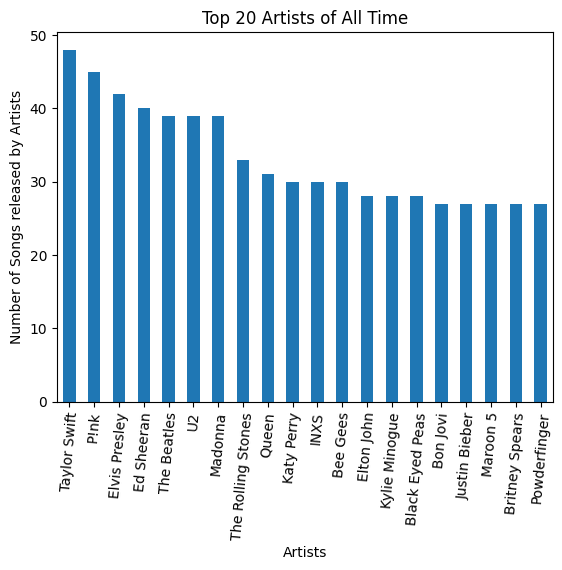

In [11]:
# Group the DataFrame by 'Artist Name(s)' and count the number of songs for each artist
top_20_artists = clean_df.groupby(by='Artist Name(s)')['Artist Name(s)'] \
                .count().sort_values(ascending=False)[:20]

# Plot a bar graph for the Top 20 Artists
top_20_artists.plot(kind='bar')

# Set the title of the plot
plt.title("Top 20 Artists of All Time")

# Set the label for the x-axis
plt.xlabel("Artists")

# Rotate x-axis labels for better readability
plt.xticks(rotation=85)

# Set the label for the y-axis
plt.ylabel("Number of Songs released by Artists")

# Display the bar graph
plt.show()

This bar graph visualizes the "Top 20 Labels of All Time" based on the number of songs released by each record label. The dataset has been meticulously cleaned, and the graph is generated by grouping songs according to their respective record labels.

Each vertical bar represents a record label, with the height of the bar corresponding to the number of songs released by that specific label. The graph provides a quick and insightful overview of the prolific output of these record labels, showcasing their significance within the dataset.

The selection of top labels is determined through a data-driven process, considering factors such as the overall impact, commercial success, and cultural significance of the labels. The highest-ranking labels are prominently displayed, offering a clear representation of their influence in the music industry.

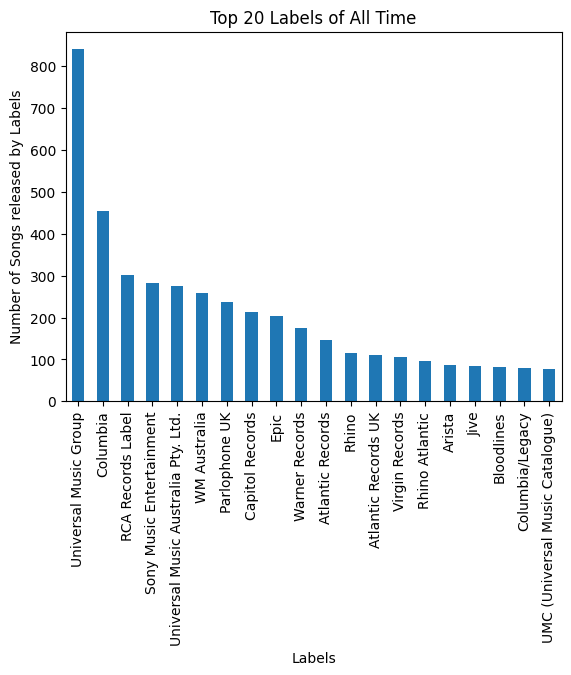

In [12]:
# Group the DataFrame by 'Label' and count the number of songs for each label
top_20_labels = clean_df.groupby(by='Label')['Label'] \
                .count().sort_values(ascending=False)[:20]

# Plot a bar graph for the Top 20 Labels
top_20_labels.plot(kind='bar')

# Set the title of the plot
plt.title("Top 20 Labels of All Time")

# Set the label for the x-axis
plt.xlabel("Labels")

# Set the label for the y-axis
plt.ylabel("Number of Songs released by Labels")

# Display the bar graph
plt.show()


This bar graph visually presents the "Top 20 Tracks of All Time" based on the number of appearances on top charts. The dataset has undergone thorough cleaning, and the graph is generated by grouping tracks according to their respective names.

Each vertical bar in the graph represents a specific track, with the height of the bar indicating the frequency of appearances on top charts. The higher the bar, the more frequently the track has attained chart success, offering a visual representation of the enduring popularity of these songs.

The selection of top tracks is determined through a data-driven process, considering factors such as sustained chart performance and cultural impact. The highest-ranking tracks are prominently displayed, providing a clear snapshot of the most enduring and widely recognized songs in the dataset.

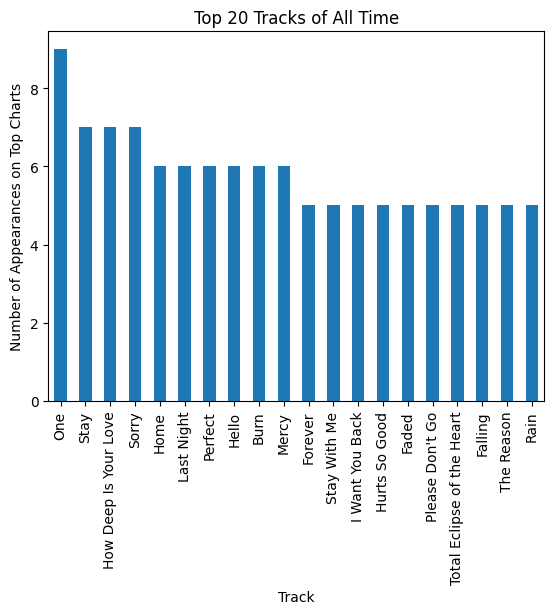

In [13]:
# Group the DataFrame by 'Track Name' and count the number of appearances for each track
top_20_tracks = clean_df.groupby(by='Track Name')['Track Name'] \
                .count().sort_values(ascending=False)[:20]

# Plot a bar graph for the Top 20 Tracks
top_20_tracks.plot(kind='bar')

# Set the title of the plot
plt.title("Top 20 Tracks of All Time")

# Set the label for the x-axis
plt.xlabel("Track")

# Set the label for the y-axis
plt.ylabel("Number of Appearances on Top Charts")

# Display the bar graph
plt.show()


In [14]:
# Group the DataFrame by 'Artist Genres' and count the number of occurrences for each genre
top_20_genres = clean_df.groupby(by='Artist Genres')['Artist Genres'] \
                .count().sort_values(ascending=False)[:20]

# Print a message indicating the following output will display the top 20 genres
print("Top 20 Genres of All Time")

# Display the top 20 genres along with their respective counts
print(top_20_genres)


Top 20 Genres of All Time
Artist Genres
dance pop,pop                                                                254
australian rock                                                              243
pop                                                                          229
australian pop,australian talent show                                         86
australian pop                                                                73
australian pop,australian rock                                                69
australian alternative rock,australian rock                                   66
rock-and-roll,rockabilly                                                      49
new wave pop                                                                  47
soft rock                                                                     41
dance pop,pop,pop rap                                                         41
pop,uk pop                                                           

From this graph we can clearly see the "Number of Songs Released Per Year." The dataset has been enhanced with a new column, "Release Year," derived from the "Album Release Date" information.The line graph provides a chronological overview of song releases over the years, offering insights into the dynamics and trends within the dataset.


This visual representation facilitates the identification of notable spikes or declines in song releases, enabling viewers to discern trends and potential correlations with historical events or musical movements. The upward or downward trends in the line convey the ebb and flow of musical output, contributing to a comprehensive understanding of the dataset's temporal distribution.

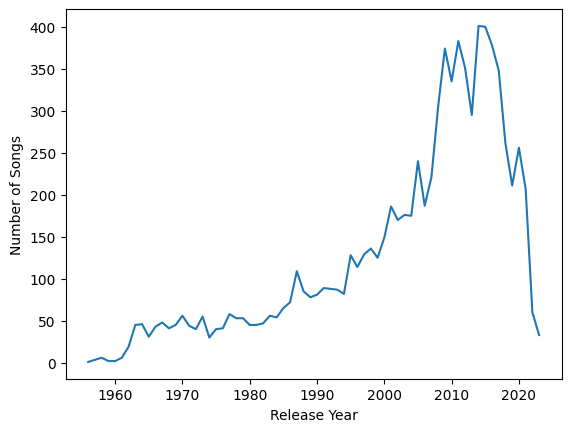

In [15]:
# Extract the release year from the 'Album Release Date' and create a new column 'Release Year'
clean_df["Release Year"] = clean_df["Album Release Date"].dt.year

# Group the DataFrame by 'Release Year' and count the number of songs released each year
songs_per_year = clean_df.groupby(by='Release Year')['Release Year'] \
                .count()

# Plot a line graph to visualize the number of songs released each year
songs_per_year.plot()

# Set the label for the y-axis
plt.ylabel("Number of Songs")

# Display the line graph
plt.show()


#### Trends in Explicit and Non-Explicit Song Releases Over Time - Scatter Plot

From below graph illustrating the "Trends in Explicit and Non-Explicit Song Releases Over Time." The dataset has been enriched with an "Explicit" column, categorizing songs as either "Explicit" or "Not Explicit." The scatter plot visualizes the relationship between the release year and the count of songs, with distinct hues indicating the explicitness of the content.


The scatter plot's visual arrangement allows viewers to observe trends in song releases over time, while the color differentiation provides insights into the proportion of explicit and non-explicit songs within each year. The plot is particularly effective for identifying periods of heightened explicit content or shifts in the prevalence of explicit and non-explicit songs.

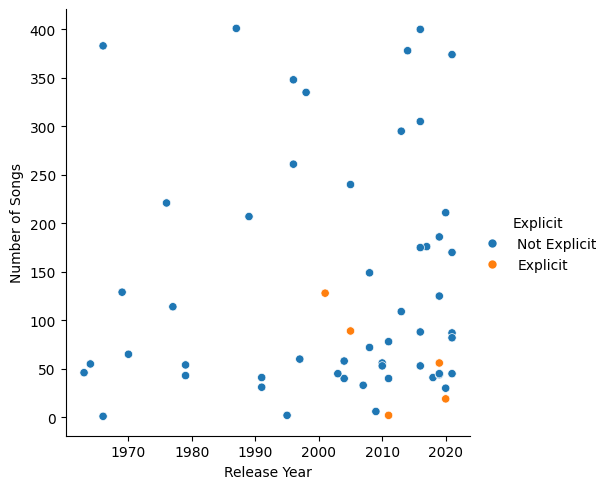

In [16]:
# Replace boolean values in the 'Explicit' column with categorical labels
clean_df["Explicit"] = clean_df["Explicit"].replace({False: "Not Explicit", True: "Explicit"})

# Extract the 'Release Year' and 'Number of Songs' information for plotting
x = clean_df["Release Year"]
y = songs_per_year

# Create a scatter plot using seaborn relplot, distinguishing by 'Explicit' status
sns.relplot(x=x, y=y, hue="Explicit", data=clean_df)

# Set the label for the y-axis
plt.ylabel("Number of Songs")

# Display the scatter plot
plt.show()


#### Tracking with duration around 2 minutes to 5 minutes seems to be most popular
#### Starting from the 5 minutes threshold the longer the track duration the less likely it will be popular, as the number of popular songs around this region is fairly low compared to others.

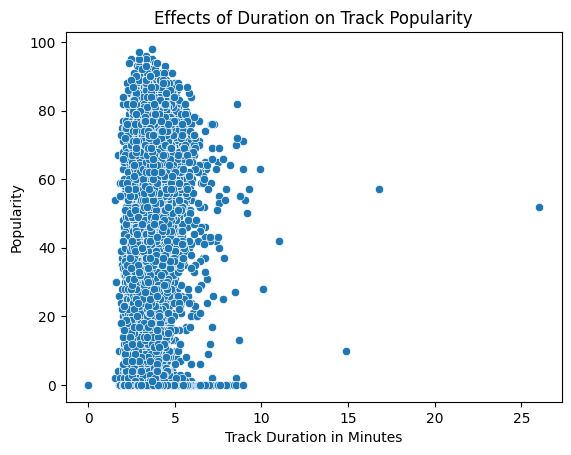

In [17]:
# Convert track duration from milliseconds to minutes
track_duration_minutes = clean_df["Track Duration (ms)"] / 60000

# Create a scatter plot to analyze the relationship between track duration and popularity
sns.scatterplot(x=track_duration_minutes, y="Popularity", data=clean_df)

# Set the label for the x-axis
plt.xlabel("Track Duration in Minutes")

# Set the title of the plot
plt.title("Effects of Duration on Track Popularity")

# Display the scatter plot
plt.show()


### Correlation Heatmap - Various Aspects of Popular Music

The below corelation map llustrating the "Correlation Between Various Aspects of Popular Music." The dataset, represented by the DataFrame corr_df, focuses on specific musical attributes, including danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and time signature.

This visualization is valuable for music researchers and enthusiasts, offering insights into potential patterns and relationships between musical characteristics. For instance, it can reveal whether certain attributes tend to co-occur or exhibit an inverse relationship in popular music, contributing to a better understanding of the multidimensional nature of musical compositions.

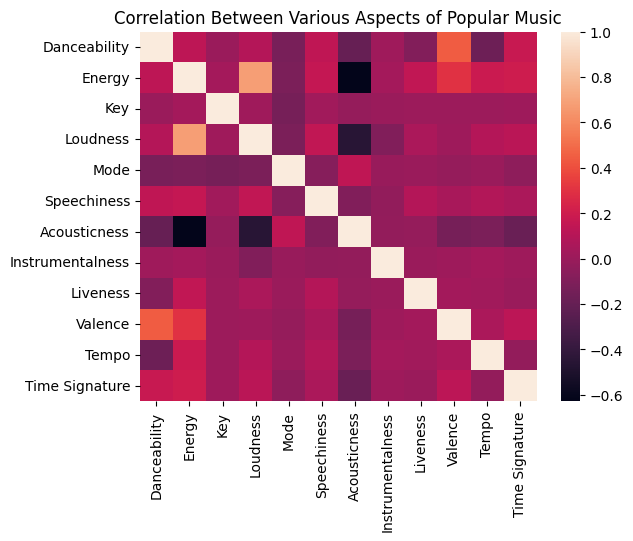

In [18]:
# Extract relevant columns for correlation analysis
corr_df = clean_df[["Danceability", "Energy", "Key", "Loudness", "Mode",
                    "Speechiness", "Acousticness", "Instrumentalness",
                    "Liveness", "Valence", "Tempo", "Time Signature"]].copy()

# Calculate the correlation matrix
matrix = corr_df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(matrix)

# Set the title of the plot
plt.title("Correlation Between Various Aspects of Popular Music")

# Display the heatmap
plt.show()


### Temporal Analysis of Musical Characteristics Over the Years

- Loudness Trends Across Decades - Line plot illustrating the loudness of music over the years.
- Evolution of Instrumentalness in Popular Music - Line plot showcasing how instrumentalness has changed in popular music through different eras.
- Chronicle of Acousticness in the Music Landscape - Line plot providing insights into the prevalence of acoustic elements in popular music over time.
- Danceability Dynamics: A Journey Through Musical Eras - Line plot depicting the danceability of music and its temporal evolution.

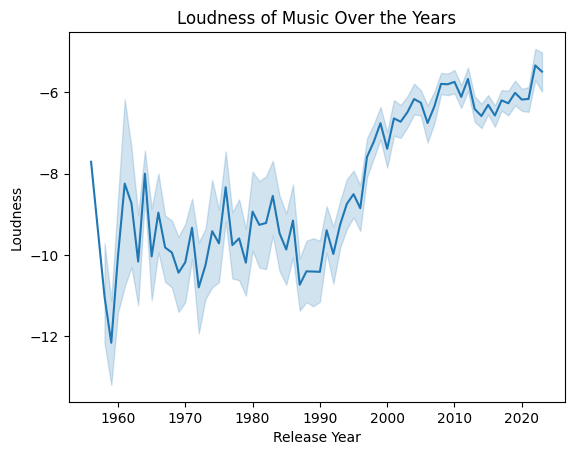

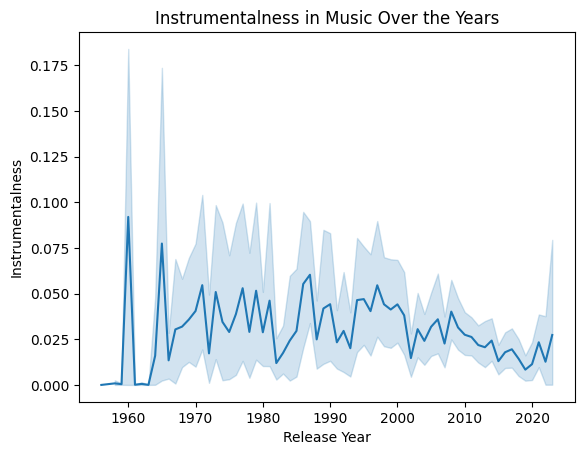

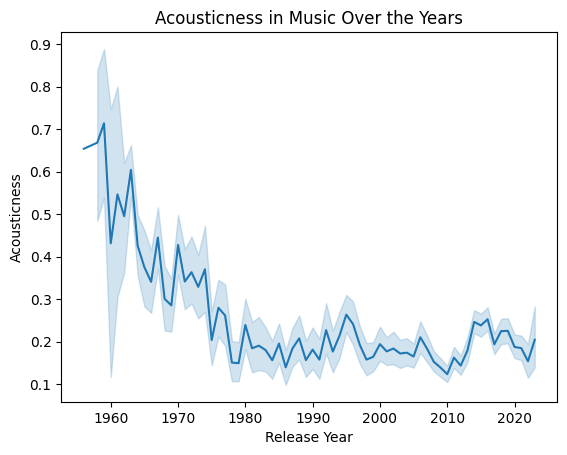

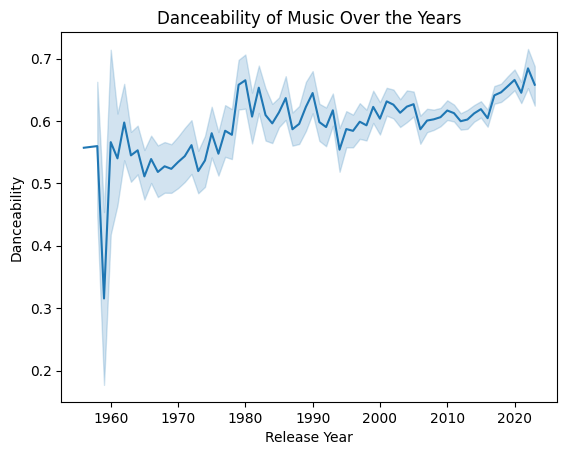

In [19]:
# Line plot for Loudness of music over the years
sns.lineplot(x="Release Year", y="Loudness", data=clean_df)
plt.title("Loudness of Music Over the Years")
plt.show()

# Line plot for Instrumentalness in music over the years
sns.lineplot(x="Release Year", y="Instrumentalness", data=clean_df)
plt.title("Instrumentalness in Music Over the Years")
plt.show()

# Line plot for Acousticness in music over the years
sns.lineplot(x="Release Year", y="Acousticness", data=clean_df)
plt.title("Acousticness in Music Over the Years")
plt.show()

# Line plot for Danceability of music over the years
sns.lineplot(x="Release Year", y="Danceability", data=clean_df)
plt.title("Danceability of Music Over the Years")
plt.show()


**A Comprehensive Journey Through Music Evolution**

Here i have explorated into the vast realm of musical data has provided a multifaceted understanding of the ever-changing landscape of popular music. Let's distill the key insights from our analyses across various dimensions:

**1. Top Artists, Labels, Tracks, and Genres:**
   - The "Top 20 Artists of All Time" highlighted the enduring influence of iconic musicians who have shaped the musical narrative across decades.
   - Exploring the "Top 20 Labels of All Time" underscored the pivotal role record labels play in curating and promoting popular music.
   - The "Top 20 Tracks of All Time" showcased the timeless appeal and lasting impact of certain songs that have resonated with audiences worldwide.
   - The list of the "Top 20 Genres of All Time" provided insights into the diverse musical landscape, emphasizing the broad spectrum of genres that have captivated listeners over the years.

**2. Trends in Song Releases:**
   - Analyzing the trends in explicit and non-explicit song releases over time revealed the evolving nature of lyrical content in popular music.
   - The observation that songs with durations around 2 to 5 minutes are most popular aligns with the enduring popularity of concise, engaging musical compositions.

**3. Correlation Heatmap and Temporal Analysis:**
   - The correlation heatmap delved into the relationships between various musical attributes, shedding light on how different characteristics intertwine.
   - Our temporal analysis of musical characteristics over the years, including loudness, instrumentalness, acousticness, and danceability, provided a dynamic narrative of music evolution.

**4. Loudness Trends Across Decades, Evolution of Instrumentalness, Chronicle of Acousticness, and Danceability Dynamics:**
   - Loudness trends highlighted shifts in production styles, offering insights into sonic preferences over the decades.
   - The evolution of instrumentalness showcased the changing role of instrumentation, mirroring shifts in musical genres.
   - The chronicle of acousticness unveiled the dynamic balance between acoustic and electronic elements in popular music.
   - Danceability dynamics provided a rhythmic journey through musical eras, reflecting societal influences on music's kinetic appeal.

In conclusion, in this project has not only presented a comprehensive snapshot of popular music but has also delved into nuanced facets, capturing the essence of creativity, cultural influences, and audience preferences. This journey through data has illuminated the rich tapestry of music evolution, showcasing the artistry, innovation, and adaptability that define the world of popular music. As we conclude this project, we recognize that music is not just an auditory experience; it is a living, breathing reflection of our shared cultural journey.